In [1]:
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
from scipy.interpolate import interp1d as interp1d
from astropy.table import Table, join

In [2]:
distData = ascii.read('apjaa75cat2_mrt.txt')
crossData = ascii.read('tgas_combined_obs.txt')
tgasData = fits.open('stacked_tgas.fits')
photoData = fits.open('photoParallaxAnderson17Mini.fits')

In [3]:
crossTable = Table(crossData)
tgasTable = Table(tgasData[1].data)
photoTable = Table(photoData[1].data)
distTable = Table(distData)

In [4]:
tgasTable.rename_column('tycho2_id', 'TYC')
photoTable.rename_column('tycho2_id', 'TYC')

In [5]:
blah2 = join(photoTable, crossTable, keys='TYC')
blah3 = join(blah2, distTable, keys='KIC')
blah4 = join(blah3, tgasTable, keys='TYC')

In [6]:
blah4

TYC,source_id_1,ra_1,dec_1,J_Ks,M_J,E(B_V),parallax_expectation_value,parallax_variance,l_1,b_1,KIC,ra_2,dec_2,numax,sig_numax,dnu,sig_dnu,teff_1,sig_teff,logg_1,sig_logg,feh_1,sig_feh,plx,sig_plx,btmag,sig_btmag,vtmag,sig_vtmag,gmag,sig_gmag,rmag,sig_rmag,imag,sig_imag,zmag,sig_zmag,jmag,sig_jmag,hmag,sig_hmag,kmag,sig_kmag,clump,src_1,teff_2,e_teff,logg_2,e_logg,feh_2,e_feh,r-dir,E_r-dir,e_r-dir,d-dir,E_d-dir,e_d-dir,av-dir,r-dir-cor,E_r-dir-cor,e_r-dir-cor,d-dir-cor,E_d-dir-cor,e_d-dir-cor,av-dir-cor,r-grid,E_r-grid,e_r-grid,d-grid,E_d-grid,e_d-grid,av-grid,E_av-grid,e_av-grid,r-grid-cor,E_r-grid-cor,e_r-grid-cor,d-grid-cor,E_d-grid-cor,e_d-grid-cor,av-grid-cor,E_av-grid-cor,e_av-grid-cor,r-gaia,E_r-gaia,e_r-gaia,d-gaia,E_d-gaia,e_d-gaia,av-gaia,evstate,src_2,hip,solution_id,source_id_2,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_good_obs_ac,astrometric_n_bad_obs_al,astrometric_n_bad_obs_ac,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_primary_flag,astrometric_relegation_factor,astrometric_weight_al,astrometric_weight_ac,astrometric_priors_used,matched_observations,duplicated_source,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l_2,b_2,ecl_lon,ecl_lat
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,K,K,[cm/s],[cm/s],[Sun],[Sun],solRad,solRad,solRad,pc,pc,pc,mag,solRad,solRad,solRad,pc,pc,pc,mag,solRad,solRad,solRad,pc,pc,pc,mag,mag,mag,solRad,solRad,solRad,pc,pc,pc,mag,mag,mag,solRad,solRad,solRad,pc,pc,pc,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
str12,int32,float64,float64,float32,float32,float32,float32,float32,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,str3,int32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,float32,float64,float64,bool,float32,float32,float32,int32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,str13,float64,float64,float64,float64
2652-223-1,1420288,286.250237337,37.4823036491,0.61277,-1.03277,0.0669047,0.879695,0.0153716,68.3328985372,13.633044977,1995859,286.250254,37.482307,46.035,1.153,4.779,0.045,4950.1,86.0,2.578,0.012,-0.189,0.06,0.79446131,0.29580924,12.353,0.165,11.241,0.083,11.619,0.02,10.808,0.02,10.489,0.02,10.308,0.02,9.293,0.02,8.796,0.02,8.653,0.018,1,apo,4950,86,2.578,0.012,-0.189,0.06,11.021,0.391,0.391,1168,61,61,0.266,11.162,0.396,0.396,1182,61,61,0.267,11.236,0.349,0.139,1176,37,18,0.313,0.08,0.08,11.287,0.301,0.162,1180,33,21,0.313,0.08,0.08,11.635,25.917,3.24,1316,2783,384,0.284,1,apo,-2147483648,1635378410781933568,2099077717308058624,1154843,2015.0,286.250237337,0.156439559439,37.4823036491,0.241181393988,0.794461303289,0.295809249963,0.10761470732,0.89874075082,-8.48491521741,0.714813219

In [7]:
parallax_dir = 1e3/blah4['d-dir-cor']
parallax_dir_err = blah4['E_d-dir-cor']/blah4['d-dir-cor']**2*1e3

In [8]:
sig_dif_phot = np.abs(blah4['parallax_expectation_value'] - parallax_dir)#/parallax_dir #/np.sqrt(blah4['parallax_variance'] + parallax_dir_err**2.)
blah_phot = scipy.cumsum(sig_dif_phot[np.argsort(sig_dif_phot)])
ff_phot = interp1d(sig_dif_phot[np.argsort(sig_dif_phot)], blah_phot/np.max(blah_phot))
sig_dif_tgas = np.abs(blah4['parallax'] - parallax_dir)#/parallax_dir#/np.sqrt(blah4['parallax_error'] + parallax_dir_err**2.)
blah_tgas = scipy.cumsum(sig_dif_tgas[np.argsort(sig_dif_tgas)])
ff_tgas = interp1d(sig_dif_tgas[np.argsort(sig_dif_tgas)], blah_tgas/np.max(blah_tgas))

1 0.90348860506807 0.8562753181051425
2 0.9593467289017487 0.9669994966604747
3 0.9657019313505659 0.977077026095005


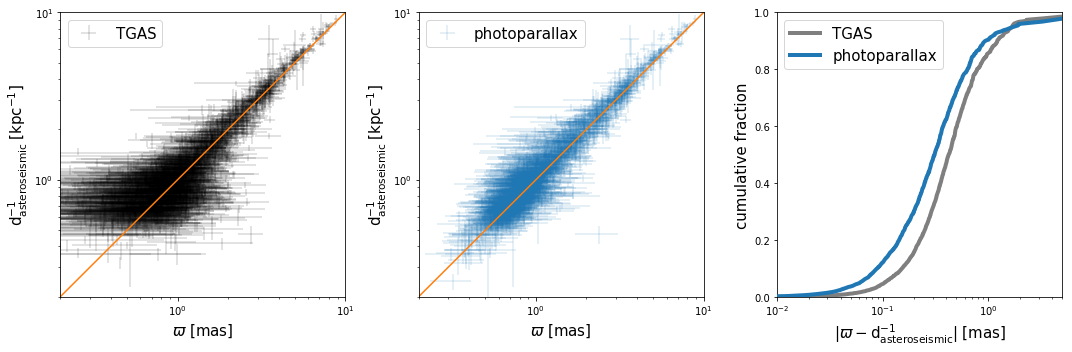

In [10]:
#plt.scatter(blah3['parallax_expectation_value'], 1e3/blah3['d-dir-cor'], s=1)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].errorbar(blah4['parallax'], 1e3/blah4['d-dir-cor'], alpha=0.15, xerr=[blah4['parallax_error'], blah4['parallax_error']], yerr=[blah4['E_d-dir-cor']/blah4['d-dir-cor']**2*1e3, blah4['e_d-dir-cor']/blah4['d-dir-cor']**2*1e3], fmt='o', markersize=0, c='black', label='TGAS')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(0.2, 10)
ax[0].set_ylim(0.2, 10)
ax[0].plot([0.0001, 1000], [0.0001, 1000], color='C1')
ax[0].set_xlabel(r'$\varpi$ [mas]', fontsize=15)
ax[0].set_ylabel(r'$\mathrm{d}_\mathrm{asteroseismic}^{-1} \; [\mathrm{kpc}^{-1}]$', fontsize=15)

ax[1].errorbar(blah3['parallax_expectation_value'], 1e3/blah3['d-dir-cor'], alpha=0.15, xerr=[np.sqrt(blah3['parallax_variance']), np.sqrt(blah3['parallax_variance'])], yerr=[blah3['E_d-dir-cor']/blah3['d-dir-cor']**2*1e3, blah3['e_d-dir-cor']/blah3['d-dir-cor']**2*1e3], fmt='o', markersize=0, label='photoparallax')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(0.2, 10)
ax[1].set_ylim(0.2, 10)
ax[1].plot([0.0001, 1000], [0.0001, 1000], color='C1')
ax[1].set_xlabel(r'$\varpi$ [mas]', fontsize=15)
ax[1].set_ylabel(r'$\mathrm{d}_\mathrm{asteroseismic}^{-1} \; [\mathrm{kpc}^{-1}]$', fontsize=15)


#ax[1].scatter(blah3['parallax_expectation_value'], blah3['parallax_expectation_value']/(1e3/blah3['d-dir-cor']), s=1)
#ax[1].set_ylim(0.4, 2.25)
#ax[1].set_xlim(0.2, 10)
#ax[1].set_xscale('log')
#ax[1].axhline(1, c='C1')
#ax[1].set_xlabel(r'$\varpi$ [mas]', fontsize=15)
#ax[1].set_ylabel(r'$\varpi \; \times \; d_\mathrm{asteroseismic}$', fontsize=15)

ax[2].plot(sig_dif_tgas[np.argsort(sig_dif_tgas)], blah_tgas/np.max(blah_tgas), zorder=1, linewidth=4, color='black', alpha=0.5, label='TGAS')
ax[2].plot(sig_dif_phot[np.argsort(sig_dif_phot)], blah_phot/np.max(blah_phot), zorder=3, linewidth=4, label='photoparallax')
ax[2].set_xlabel(r'$|\varpi - \mathrm{d}_\mathrm{asteroseismic}^{-1}| \; [\mathrm{mas}]$', fontsize=15)
ax[2].set_ylabel('cumulative fraction', fontsize=15)

minx = 0.01

for xx in [1, 2, 3]:
#    ax[2].plot([xx, xx], [minx, ff_phot(xx)], c='C1', zorder=0, linewidth=2, linestyle='--')
#    ax[2].plot([minx, xx],[ff_phot(xx), ff_phot(xx)], c='C1', zorder=1, linewidth=2, linestyle='--')
    print(xx, ff_phot(xx), ff_tgas(xx))
ax[2].set_xlim(0.01, 5)
ax[2].set_ylim(0, 1.0)
ax[2].set_xscale('log')
ax[0].legend(loc='upper left', fontsize=15)
ax[1].legend(loc='upper left', fontsize=15)
ax[2].legend(loc='upper left', fontsize=15)
fig.tight_layout()
fig.savefig('paper/photoVSseismic.pdf', rasterized=True)

In [230]:
sig_dif = np.abs(blah4['parallax'] - parallax_dir)/np.sqrt(blah4['parallax_error'] + parallax_dir_err**2.)
blah = scipy.cumsum(sig_dif[np.argsort(sig_dif)])
ff = interp1d(sig_dif[np.argsort(sig_dif)], blah/np.max(blah))

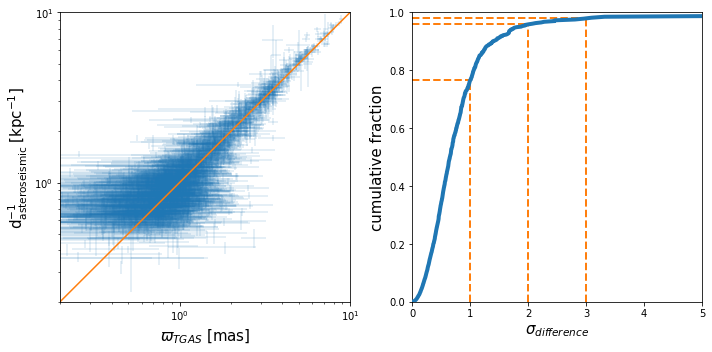

In [210]:
#plt.scatter(blah3['parallax_expectation_value'], 1e3/blah3['d-dir-cor'], s=1)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(blah4['parallax'], 1e3/blah4['d-dir-cor'], alpha=0.15, xerr=[blah4['parallax_error'], blah4['parallax_error']], yerr=[blah4['E_d-dir-cor']/blah4['d-dir-cor']**2*1e3, blah4['e_d-dir-cor']/blah4['d-dir-cor']**2*1e3], fmt='o', markersize=0)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(0.2, 10)
ax[0].set_ylim(0.2, 10)
ax[0].plot([0.0001, 1000], [0.0001, 1000])
ax[0].set_xlabel(r'$\varpi_{TGAS}$ [mas]', fontsize=15)
ax[0].set_ylabel(r'$\mathrm{d}_\mathrm{asteroseismic}^{-1} \; [\mathrm{kpc}^{-1}]$', fontsize=15)

#ax[1].scatter(blah4['parallax'], blah4['parallax']/(1e3/blah4['d-dir-cor']), s=1)
#ax[1].set_ylim(0.4, 2.25)
#ax[1].set_xlim(0.2, 10)
#ax[1].set_xscale('log')
#ax[1].axhline(1, c='C1')
#ax[1].set_xlabel(r'$\varpi_{TGAS}$ [mas]', fontsize=15)
#ax[1].set_ylabel(r'$\varpi_{TGAS} \; \times \; d_\mathrm{asteroseismic}$', fontsize=15)

ax[1].plot(sig_dif[np.argsort(sig_dif)], blah/np.max(blah), zorder=3, linewidth=4)
ax[1].set_xlabel(r'$\sigma_{difference}$', fontsize=15)
ax[1].set_ylabel('cumulative fraction', fontsize=15)

for xx in [1, 2, 3]:
    ax[1].plot([xx, xx], [0, ff(xx)], c='C1', zorder=0, linewidth=2, linestyle='--')
    ax[1].plot([0, xx],[ff(xx), ff(xx)], c='C1', zorder=1, linewidth=2, linestyle='--')

ax[1].set_xlim(0, 5)
ax[1].set_ylim(0, 1.0)


fig.tight_layout()
fig.savefig('paper/tgasVSseismic.pdf', rasterized=True)

(0.4, 2.5)

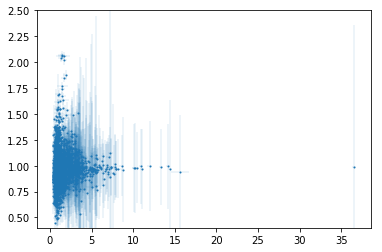

In [77]:
plt.scatter(blah4['parallax_expectation_value'], blah4['parallax_expectation_value']/(1e3/blah4['d-dir-cor']), s=1)
plt.errorbar(blah3['parallax_expectation_value'], blah3['parallax_expectation_value']/(1e3/blah3['d-dir-cor']), \
             xerr=[np.sqrt(blah3['parallax_variance']), np.sqrt(blah3['parallax_variance'])], \
             yerr=[blah3['E_d-dir-cor']/blah3['d-dir-cor']**2*1e3, blah3['e_d-dir-cor']/blah3['d-dir-cor']**2*1e3], \
             fmt='o', markersize=0, alpha=0.1)
plt.ylim(0.4, 2.5)
#plt.xscale('log')

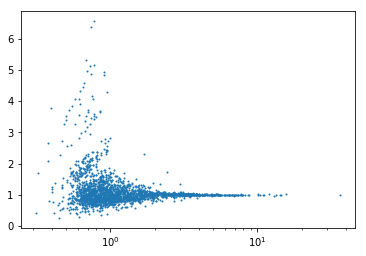

In [47]:
plt.scatter(blah3['parallax_expectation_value'], blah3['parallax_expectation_value']/(1e3/blah3['d-gaia']), s=1)
plt.xscale('log')

(0.01, 25)

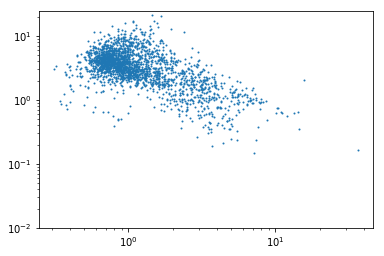

In [125]:
plt.scatter(blah4['parallax_expectation_value'], np.sqrt(blah4['parallax_variance'])/(blah4['E_d-dir-cor']/blah4['d-dir-cor']**2*1e3), s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01, 25)

(array([  2.04800000e+03,   1.40000000e+02,   9.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.89248999e-04,   1.62368698e+00,   3.24718470e+00,
          4.87068243e+00,   6.49418016e+00,   8.11767789e+00,
          9.74117561e+00,   1.13646733e+01,   1.29881711e+01,
          1.46116688e+01,   1.62351665e+01]),
 <a list of 10 Patch objects>)

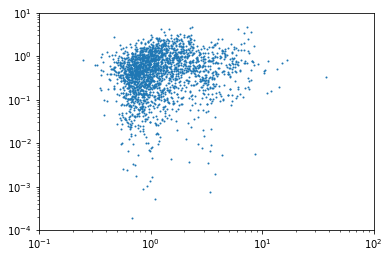

In [152]:
plt.scatter(parallax_dir, np.abs(blah4['parallax_expectation_value'] - parallax_dir)/np.sqrt(blah4['parallax_variance'] + parallax_dir_err**2.), s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 100)
plt.ylim(0.0001, 10)


Object `np.cdf` not found.


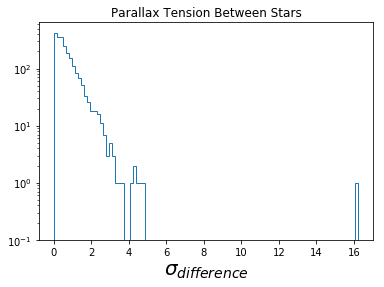

In [165]:
plt.hist(np.abs(blah4['parallax_expectation_value'] - parallax_dir)/np.sqrt(blah4['parallax_variance'] + parallax_dir_err**2.), bins=100, histtype='step', log=True)
plt.title('Parallax Tension Between Stars')
plt.xlabel(r'$\sigma_{difference}$', fontsize=20)


(0.0001, 10)

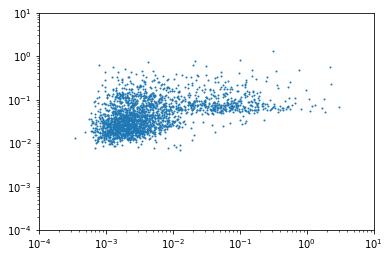

In [148]:
plt.scatter(parallax_dir_err**2., blah4['parallax_variance'],s=1)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 10)
plt.ylim(0.0001, 10)

In [179]:
sig_dif = np.abs(blah4['parallax_expectation_value'] - parallax_dir)/np.sqrt(blah4['parallax_variance'] + parallax_dir_err**2.)
blah = scipy.cumsum(sig_dif[np.argsort(sig_dif)])
ff = interp1d(sig_dif[np.argsort(sig_dif)], blah/np.max(blah))

(0, 1.0)

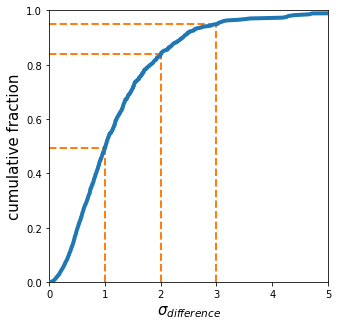

In [201]:
plt.figure(figsize=(5,5))
plt.plot(sig_dif[np.argsort(sig_dif)], blah/np.max(blah), zorder=3, linewidth=4)
plt.xlabel(r'$\sigma_{difference}$', fontsize=15)
plt.ylabel('cumulative fraction', fontsize=15)

for xx in [1, 2, 3]:
    plt.plot([xx, xx], [0, ff(xx)], c='C1', zorder=0, linewidth=2, linestyle='--')
    plt.plot([0, xx],[ff(xx), ff(xx)], c='C1', zorder=1, linewidth=2, linestyle='--')

plt.xlim(0, 5)
plt.ylim(0, 1.0)

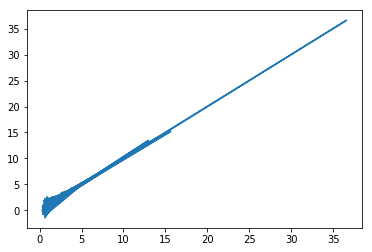

In [187]:
plt.plot(blah4['parallax_expectation_value'], blah4['parallax'])

In [189]:
np.min(blah4['parallax_expectation_value'])

0.3127467